In [3]:
using Catlab
using Catlab.WiringDiagrams
using Catlab.Doctrines
import Catlab.Doctrines: ⊗, id
import Base: ∘

using Catlab.Graphics
import Catlab.Graphics: Graphviz

show_diagram(d::WiringDiagram) = to_graphviz(d,
    direction=:vertical,
    labels=true, label_attr=:xlabel,
    node_attrs=Graphviz.Attributes(
        :fontname => "Courier",
    ),
    edge_attrs=Graphviz.Attributes(
        :fontname => "Courier",
    )
)

⊗(a::WiringDiagram, b::WiringDiagram) = otimes(a, b)
∘(a::WiringDiagram, b::WiringDiagram) = compose(b, a)
⊚(a,b) = b ∘ a

⊚ (generic function with 1 method)

In [4]:
# =====================================================================
# Translated lambda functions for SIR-simple model from Python to Julia
# =====================================================================
function assg__rec(γ, I, δt)
    return (γ*I) * δt
end

function assg__inf(β, S, I, R, δt)
    return (-(β*S*I) / (S+I+R)) * δt
end

function assg__I1(I, infected, recovered)
    return I + infected - recovered
end

function assg__R1(R, recovered)
    return R + recovered
end

function assg__S1(S, infected)
    return S - infected
end

assg__S1 (generic function with 1 method)

In [7]:
# ==============================================================================
# Translated wiring of the SIR-simple model
# from GrFN to WiringDiagram specification
# ==============================================================================
β, S0, I0, R0, δt, γ = Ob(FreeSymmetricMonoidalCategory, :β, :S0, :I0, :R0, :δt, :γ)
id_S0 = id(Ports([S0]))
id_I0 = id(Ports([I0]))
id_R0 = id(Ports([R0]))

IN_0 = WiringDiagram(Hom(:L0_REWIRE, S0 ⊗ I0 ⊗ R0 ⊗ β ⊗ γ ⊗ δt, S0 ⊗ I0 ⊗ R0 ⊗ β ⊗ S0 ⊗ I0 ⊗ R0 ⊗ δt ⊗ γ ⊗ I0 ⊗ δt))
rec, inf = Ob(FreeSymmetricMonoidalCategory, :rec, :inf)
WD_inf = WiringDiagram(Hom(assg__inf, β ⊗ S0 ⊗ I0 ⊗ R0 ⊗ δt, inf))
WD_rec = WiringDiagram(Hom(assg__rec, γ ⊗ I0 ⊗ δt, rec))
OUT_1 = IN_0 ⊚ (id_S0 ⊗ id_I0 ⊗ id_R0 ⊗ WD_inf ⊗ WD_rec)

IN_1 = WiringDiagram(Hom(:L1_REWIRE, S0 ⊗ I0 ⊗ R0 ⊗ inf ⊗ rec, S0 ⊗ inf ⊗ I0 ⊗ inf ⊗ rec ⊗ R0 ⊗ rec))
S1, I1, R1 = Ob(FreeSymmetricMonoidalCategory, :S1, :I1, :R1)
WD_S1 = WiringDiagram(Hom(assg__S1, S0 ⊗ inf, S1))
WD_I1 = WiringDiagram(Hom(assg__I1, I0 ⊗ inf ⊗ rec, I1))
WD_R1 = WiringDiagram(Hom(assg__R1, R0 ⊗ rec, R1))
OUT_2 = OUT_1 ⊚ IN_1 ⊚ (WD_S1 ⊗ WD_I1 ⊗ WD_R1)


println(OUT_2)

WiringDiagram([:S0,:I0,:R0,:β,:γ,:δt], [:S1,:I1,:R1], 
[ 1 => {inputs},
  2 => {outputs},
  3 => Box(assg__R1, [:R0,:rec], [:R1]),
  4 => Box(assg__S1, [:S0,:inf], [:S1]),
  5 => Box(:L0_REWIRE, [:S0,:I0,:R0,:β,:γ,:δt], [:S0,:I0,:R0,:β,:S0,:I0,:R0,:δt,:γ,:I0,:δt]),
  6 => Box(:L1_REWIRE, [:S0,:I0,:R0,:inf,:rec], [:S0,:inf,:I0,:inf,:rec,:R0,:rec]),
  7 => Box(assg__inf, [:β,:S0,:I0,:R0,:δt], [:inf]),
  8 => Box(assg__rec, [:γ,:I0,:δt], [:rec]),
  9 => Box(assg__I1, [:I0,:inf,:rec], [:I1]) ],
[ Wire((1,1) => (5,1)),
  Wire((1,2) => (5,2)),
  Wire((1,3) => (5,3)),
  Wire((1,4) => (5,4)),
  Wire((1,5) => (5,5)),
  Wire((1,6) => (5,6)),
  Wire((3,1) => (2,3)),
  Wire((4,1) => (2,1)),
  Wire((5,1) => (6,1)),
  Wire((5,2) => (6,2)),
  Wire((5,3) => (6,3)),
  Wire((5,4) => (7,1)),
  Wire((5,5) => (7,2)),
  Wire((5,6) => (7,3)),
  Wire((5,7) => (7,4)),
  Wire((5,8) => (7,5)),
  Wire((5,9) => (8,1)),
  Wire((5,10) => (8,2)),
  Wire((5,11) => (8,3)),
  Wire((6,6) => (3,1)),
  Wire((6,7) => (3,2))

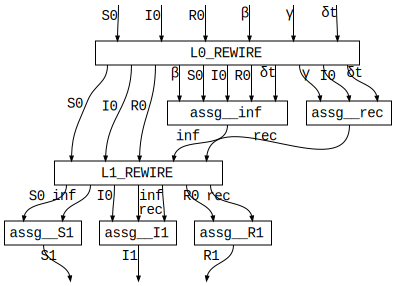

In [8]:
show_diagram(OUT_2)